<a href="https://colab.research.google.com/github/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/blob/main/Model_Implementation_Attempt_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Define file path (if manually uploaded)
file_path = "/content/Use of Energy of Energy Carriers.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows to confirm it's loaded correctly
df.head()


,Branch Code,Homogeneous Branches,Energy Carriers,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CPA08-01,"Products of agric., hunting and related services",Hard coal and hard coal products,888,946,829,1071,1185,1329,1692,...,360,1080,248,475,1766,565,368,417,34,30
1,CPA08-01,"Products of agric., hunting and related services",Brown coal (lignite) and brown coal products,1477,1346,1275,1056,873,678,545,...,0,0,0,0,0,0,0,0,0,0
2,CPA08-01,"Products of agric., hunting and related services",Crude oil,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CPA08-01,"Products of agric., hunting and related services",Petrol,4580,3610,2976,2897,2456,1926,1573,...,383,350,345,317,284,270,265,261,275,241
4,CPA08-01,"Products of agric., hunting and related services",Diesel fuels,94156,94655,94546,94130,93709,82778,81461,...,48796,47952,50725,52114,54741,56857,58373,54796,55719,56631


In [ ]:
# Convert dataset to time-series format
df_melted = df.melt(id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
                     var_name="Year",
                     value_name="Energy Consumption")

# Convert Year column to integer type
df_melted["Year"] = df_melted["Year"].astype(int)

# Display the first few rows to verify the transformation
df_melted.head()


,Branch Code,Homogeneous Branches,Energy Carriers,Year,Energy Consumption
0,CPA08-01,"Products of agric., hunting and related services",Hard coal and hard coal products,1995,888
1,CPA08-01,"Products of agric., hunting and related services",Brown coal (lignite) and brown coal products,1995,1477
2,CPA08-01,"Products of agric., hunting and related services",Crude oil,1995,0
3,CPA08-01,"Products of agric., hunting and related services",Petrol,1995,4580
4,CPA08-01,"Products of agric., hunting and related services",Diesel fuels,1995,94156


In [ ]:
df_total_yearly = df_melted.groupby("Year")["Energy Consumption"].sum().reset_index()
print(df_total_yearly.head())  # Check the first few rows


   Year  Energy Consumption
0  1995            18465426
1  1996            18682027
2  1997            18337400
3  1998            18563438
4  1999            18328142


In [ ]:
df_carrier_yearly = df_melted.groupby(["Year", "Energy Carriers"])["Energy Consumption"].sum().reset_index()
print(df_carrier_yearly.head())  # Check the first few rows


   Year                               Energy Carriers  Energy Consumption
0  1995                         Aviation turbine fuel              299573
1  1995  Brown coal (lignite) and brown coal products             1851506
2  1995                                     Crude oil             4399992
3  1995                                  Diesel fuels              855747
4  1995          Electricity and other energy sources             3300078


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Use aggregated dataset (df_carrier_yearly) for feature selection
df_fs = df_carrier_yearly.copy()

# Convert categorical 'Energy Carriers' column into numerical (One-Hot Encoding)
df_fs = pd.get_dummies(df_fs, columns=["Energy Carriers"])

# Split into features (X) and target (y)
X = df_fs.drop(columns=["Energy Consumption", "Year"])  # Features (Energy carriers)
y = df_fs["Energy Consumption"]  # Target variable (Energy consumption)

# Split dataset into training & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((249, 12), (63, 12), (249,), (63,))

                                              Feature  Importance
2                           Energy Carriers_Crude oil    0.517468
4   Energy Carriers_Electricity and other energy s...    0.214479
5                               Energy Carriers_Gases    0.089459
6    Energy Carriers_Hard coal and hard coal products    0.079201
1   Energy Carriers_Brown coal (lignite) and brown...    0.047128
9          Energy Carriers_Other mineral oil products    0.028410
3                        Energy Carriers_Diesel fuels    0.008584
11                 Energy Carriers_Renewable energies    0.008558
10                             Energy Carriers_Petrol    0.005414
0               Energy Carriers_Aviation turbine fuel    0.000703
8                      Energy Carriers_Heavy fuel oil    0.000429
7                         Energy Carriers_Heating oil    0.000168


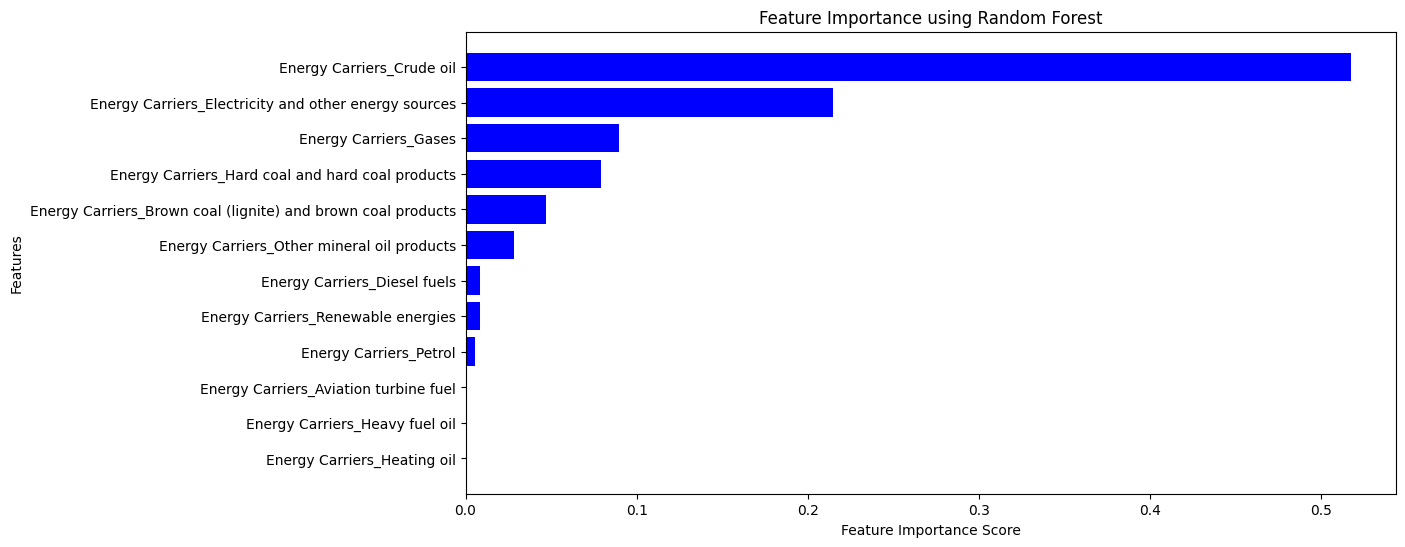

In [ ]:
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store results
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_df)

# Plot feature importance
plt.figure(figsize=(12,6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()  # Reverse order
plt.show()


                                              Feature    Importance
2                           Energy Carriers_Crude oil  2.844082e-01
6    Energy Carriers_Hard coal and hard coal products  2.802884e-01
1   Energy Carriers_Brown coal (lignite) and brown...  1.763575e-01
4   Energy Carriers_Electricity and other energy s...  1.332583e-01
5                               Energy Carriers_Gases  4.488510e-02
10                             Energy Carriers_Petrol  2.788215e-02
9          Energy Carriers_Other mineral oil products  1.850557e-02
0               Energy Carriers_Aviation turbine fuel  1.231504e-02
7                         Energy Carriers_Heating oil  1.133005e-02
8                      Energy Carriers_Heavy fuel oil  1.075887e-02
11                 Energy Carriers_Renewable energies  1.056949e-05
3                        Energy Carriers_Diesel fuels  1.401135e-07


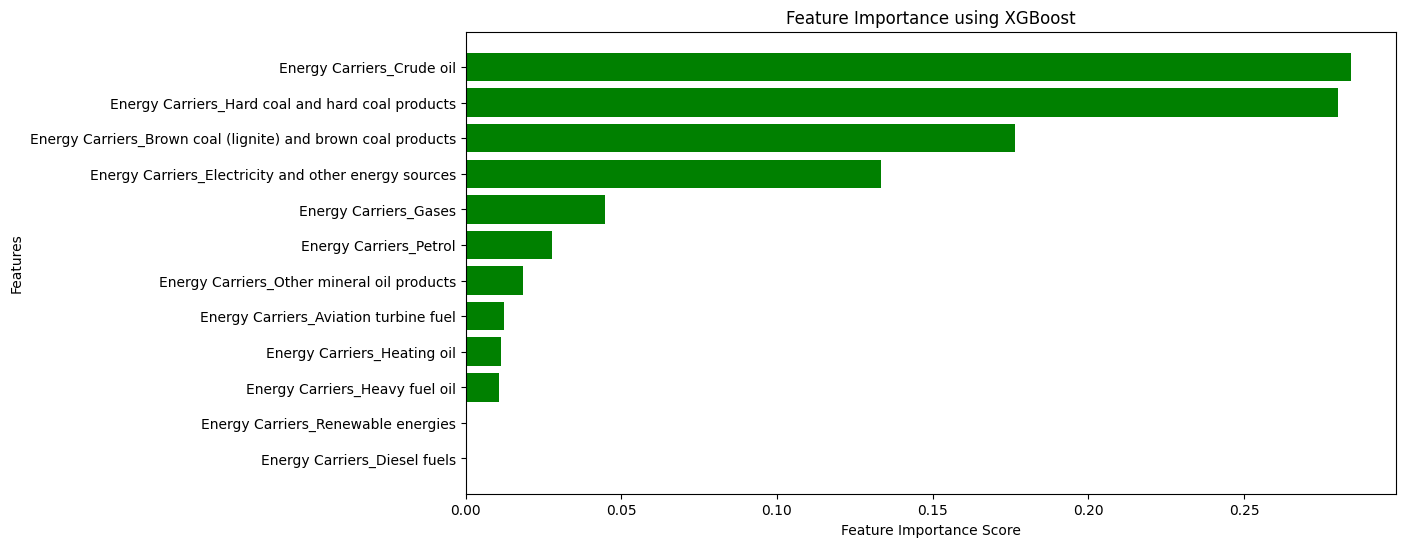

In [ ]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importance from XGBoost
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame for XGBoost results
xgb_feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importances})

# Sort by importance
xgb_feature_df = xgb_feature_df.sort_values(by='Importance', ascending=False)

# Display XGBoost feature importance
print(xgb_feature_df)

# Plot XGBoost feature importance
plt.figure(figsize=(12,6))
plt.barh(xgb_feature_df['Feature'], xgb_feature_df['Importance'], color='green')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using XGBoost")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Select only the most important features
important_features = [
    "Energy Carriers_Crude oil",
    "Energy Carriers_Electricity and other energy sources",
    "Energy Carriers_Hard coal and hard coal products",
    "Energy Carriers_Brown coal (lignite) and brown coal products",
    "Energy Carriers_Gases",
    "Energy Carriers_Petrol",
    "Energy Carriers_Other mineral oil products"
]

# Filter dataset to include only these features
df_filtered = df_carrier_yearly[df_carrier_yearly["Energy Carriers"].isin([
    "Crude oil",
    "Electricity and other energy sources",
    "Hard coal and hard coal products",
    "Brown coal (lignite) and brown coal products",
    "Gases",
    "Petrol",
    "Other mineral oil products"
])]

# Pivot table to get time-series format (Years as index, Energy Carriers as columns)
df_pivot = df_filtered.pivot(index="Year", columns="Energy Carriers", values="Energy Consumption").fillna(0)

# Create target variable (energy consumption for next year)
df_pivot["Target"] = df_pivot.shift(-1)["Crude oil"]  # Using crude oil as target for now

# Drop last row (since it has NaN in target column)
df_pivot = df_pivot.iloc[:-1]

# Define features (X) and target (y)
X = df_pivot.drop(columns=["Target"])  # Features
y = df_pivot["Target"]  # Target variable

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Check data structure
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(20, 7) (5, 7) (20,) (5,)


In [ ]:
# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict energy consumption for test set
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"XGBoost Performance:\nMSE: {mse}\nRMSE: {rmse}\nMAPE: {mape*100:.2f}%")


XGBoost Performance:
MSE: 75825046480.1
RMSE: 275363.4806580205
MAPE: 5.84%


   Year  Predicted Energy Consumption
0  2021                    4036126.25
1  2022                    4002111.75
2  2023                    4002111.75
3  2024                    4002111.75
4  2025                    4002111.75
5  2026                    4002111.75
6  2027                    4002111.75
7  2028                    4002111.75
8  2029                    4002111.75
9  2030                    4002111.75


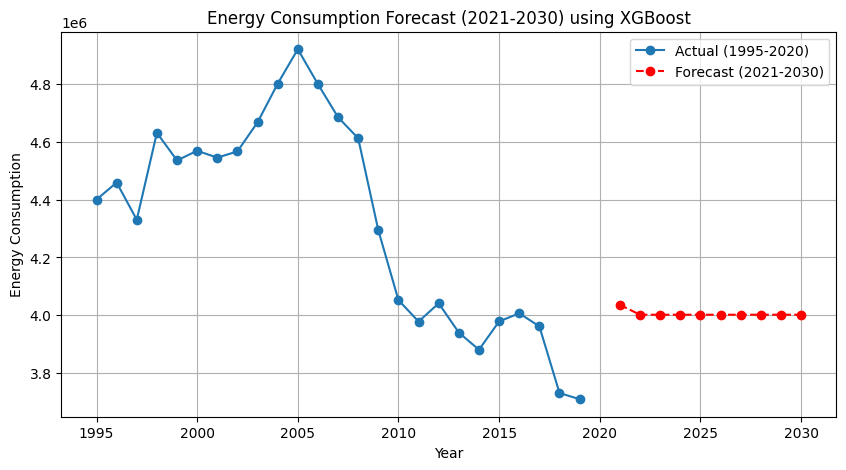

In [ ]:
# Create future years (2021-2030)
future_years = np.arange(2021, 2031)

# Predict energy consumption for future years
future_predictions = []
current_data = X.iloc[-1:].values  # Start with the last available data

for year in future_years:
    next_prediction = xgb_model.predict(current_data)[0]
    future_predictions.append(next_prediction)

    # Update current data for the next prediction
    current_data = np.roll(current_data, -1, axis=0)  # Shift data
    current_data[0, 0] = next_prediction  # Replace the oldest value with the new prediction

# Create DataFrame for future predictions
df_forecast = pd.DataFrame({"Year": future_years, "Predicted Energy Consumption": future_predictions})

# Display results
print(df_forecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot["Crude oil"], label="Actual (1995-2020)", marker='o')
plt.plot(df_forecast["Year"], df_forecast["Predicted Energy Consumption"], label="Forecast (2021-2030)", linestyle='dashed', marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (2021-2030) using XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create lag features (past values)
for lag in range(1, 4):  # Using 3 past years as features
    df_pivot[f"Lag_{lag}"] = df_pivot["Crude oil"].shift(lag)

# Drop NaN rows created by shifting
df_pivot = df_pivot.dropna()

# Update X and y
X = df_pivot.drop(columns=["Target"])  # Features
y = df_pivot["Target"]  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Perform Randomized Search for best parameters
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,
                                   n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit model
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
xgb_optimized = XGBRegressor(**best_params, random_state=42)
xgb_optimized.fit(X_train, y_train)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
import sklearn
import xgboost

print("Scikit-Learn Version:", sklearn.__version__)
print("XGBoost Version:", xgboost.__version__)


In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Perform Randomized Search for best parameters
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,
                                   n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit model (This should work now!)
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


In [ ]:
# Convert dataset into time-series format
df_melted = df.melt(id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
                     var_name="Year",
                     value_name="Energy Consumption")

df_melted["Year"] = df_melted["Year"].astype(int)

# Aggregate total energy consumption per energy carrier per year
df_carrier_yearly = df_melted.groupby(["Year", "Energy Carriers"])["Energy Consumption"].sum().reset_index()

# Pivot table for time-series format
df_pivot = df_carrier_yearly.pivot(index="Year", columns="Energy Carriers", values="Energy Consumption").fillna(0)

# Create lag features
for lag in range(1, 4):
    df_pivot[f"Lag_{lag}"] = df_pivot["Crude oil"].shift(lag)

df_pivot = df_pivot.dropna()

# Define Features (X) and Target (y)
X = df_pivot.drop(columns=["Crude oil"])  # Use other features except the target
y = df_pivot["Crude oil"]

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("Dataset Recreated Successfully!")


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Perform Randomized Search for best parameters
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,
                                   n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit model (Now this should work!)
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost
!pip install --upgrade --force-reinstall scikit-learn


In [ ]:
import sklearn
import xgboost

print("Scikit-Learn Version:", sklearn.__version__)
print("XGBoost Version:", xgboost.__version__)


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Perform Randomized Search for best parameters
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,
                                   n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit model (Now this should work!)
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


In [ ]:
!pip uninstall -y xgboost scikit-learn
!pip install xgboost==1.7.6
!pip install scikit-learn==1.1.3


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Train model with best parameters
xgb_optimized = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_optimized.fit(X_train, y_train)

# Predict energy consumption for test set
y_pred = xgb_optimized.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Optimized XGBoost Performance:\nMSE: {mse}\nRMSE: {rmse}\nMAPE: {mape*100:.2f}%")


In [ ]:
import sklearn
import xgboost

print("Scikit-Learn Version:", sklearn.__version__)  # Should be 1.1.3
print("XGBoost Version:", xgboost.__version__)  # Should be 1.7.6


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.23.5


In [ ]:
import numpy as np
import sklearn
import xgboost

print("NumPy Version:", np.__version__)
print("Scikit-Learn Version:", sklearn.__version__)
print("XGBoost Version:", xgboost.__version__)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Train model with best parameters
xgb_optimized = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_optimized.fit(X_train, y_train)

# Predict energy consumption for test set
y_pred = xgb_optimized.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Optimized XGBoost Performance:\nMSE: {mse}\nRMSE: {rmse}\nMAPE: {mape*100:.2f}%")


In [ ]:
# Create future years (2021-2030)
future_years = np.arange(2021, 2031)

# Predict energy consumption for future years
future_predictions = []
current_data = X.iloc[-1:].values  # Start with the last available data

for year in future_years:
    next_prediction = xgb_optimized.predict(current_data)[0]
    future_predictions.append(next_prediction)

    # Update current data for rolling forecast
    current_data = np.roll(current_data, -1, axis=0)  # Shift data
    current_data[0, 0] = next_prediction  # Replace oldest value with prediction

# Create DataFrame for future predictions
df_forecast = pd.DataFrame({"Year": future_years, "Predicted Energy Consumption": future_predictions})

# Display results
print(df_forecast)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot["Crude oil"], label="Actual (1995-2020)", marker='o')
plt.plot(df_forecast["Year"], df_forecast["Predicted Energy Consumption"], label="Optimized Forecast (2021-2030)", linestyle='dashed', marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Improved Energy Consumption Forecast (2021-2030) using Optimized XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install tensorflow keras scikit-learn matplotlib numpy pandas


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Save XGBoost Forecast Results
df_forecast.to_csv("/content/XGBoost_Forecast.csv", index=False)

# Save XGBoost Performance Metrics
xgboost_metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape]
}

df_xgb_metrics = pd.DataFrame(xgboost_metrics)
df_xgb_metrics.to_csv("/content/XGBoost_Performance.csv", index=False)

print("XGBoost results saved successfully!")


In [ ]:
code_xgb = """
# XGBoost Model Training & Forecasting

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train model with best parameters
xgb_optimized = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_optimized.fit(X_train, y_train)

# Predict energy consumption for test set
y_pred = xgb_optimized.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Optimized XGBoost Performance:\\nMSE: {mse}\\nRMSE: {rmse}\\nMAPE: {mape*100:.2f}%")

# Forecast 2021-2030
future_years = np.arange(2021, 2031)
future_predictions = []

current_data = X.iloc[-1:].values  # Start with the last available data

for year in future_years:
    next_prediction = xgb_optimized.predict(current_data)[0]
    future_predictions.append(next_prediction)

    # Update current data for rolling forecast
    current_data = np.roll(current_data, -1, axis=0)
    current_data[0, 0] = next_prediction

# Save XGBoost results
df_forecast = pd.DataFrame({"Year": future_years, "Predicted Energy Consumption": future_predictions})
df_forecast.to_csv("/content/XGBoost_Forecast.csv", index=False)

xgboost_metrics = {"MSE": [mse], "RMSE": [rmse], "MAPE": [mape]}
df_xgb_metrics = pd.DataFrame(xgboost_metrics)
df_xgb_metrics.to_csv("/content/XGBoost_Performance.csv", index=False)

print("XGBoost results saved successfully!")
"""

code_lstm = """
# LSTM Model Training & Forecasting

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
df_lstm_scaled = scaler.fit_transform(df_pivot[["Crude oil"]])

# Create sequences for LSTM
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 3
X_lstm, y_lstm = create_sequences(df_lstm_scaled, time_steps)

# Split into train and test sets
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape for LSTM
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=8, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# Forecast 2021-2030
future_years = np.arange(2021, 2031)
future_predictions = []

current_input = df_lstm_scaled[-time_steps:].reshape(1, time_steps, 1)

for year in future_years:
    next_prediction = model.predict(current_input)[0, 0]
    future_predictions.append(next_prediction)
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_prediction

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

df_lstm_forecast = pd.DataFrame({"Year": future_years, "Predicted Energy Consumption": future_predictions.flatten()})
df_lstm_forecast.to_csv("/content/LSTM_Forecast.csv", index=False)

print("LSTM Forecast saved successfully!")
"""

# Save both code snippets
with open("/content/Required_Codes.txt", "w") as f:
    f.write("### XGBoost Model Code ###\n" + code_xgb + "\n\n")
    f.write("### LSTM Model Code ###\n" + code_lstm + "\n")

print("All necessary codes saved successfully!")


In [ ]:
!pip uninstall -y numpy tensorflow keras
!pip install numpy==1.23.5 tensorflow==2.10 keras==2.10


In [ ]:
import pandas as pd

# Load XGBoost Forecast Results
df_forecast = pd.read_csv("/content/XGBoost_Forecast.csv")
print("Loaded XGBoost Forecast:\n", df_forecast.head())

# Load XGBoost Performance Metrics
df_xgb_metrics = pd.read_csv("/content/XGBoost_Performance.csv")
print("Loaded XGBoost Performance Metrics:\n", df_xgb_metrics)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Select only Crude Oil consumption for LSTM
df_lstm = df_pivot[["Crude oil"]].copy()

# Normalize data (LSTMs work best with values between 0-1)
scaler = MinMaxScaler(feature_range=(0,1))
df_lstm_scaled = scaler.fit_transform(df_lstm)

# Convert to DataFrame again
df_lstm_scaled = pd.DataFrame(df_lstm_scaled, index=df_lstm.index, columns=df_lstm.columns)

# Function to create sequences for LSTM
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 3  # Using past 3 years to predict next year
X_lstm, y_lstm = create_sequences(df_lstm_scaled.values, time_steps)

# Split into train (80%) and test (20%)
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape for LSTM input (samples, timesteps, features)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

print("LSTM Data Prepared!")
print("Train Shape:", X_train_lstm.shape, y_train_lstm.shape)
print("Test Shape:", X_test_lstm.shape, y_test_lstm.shape)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Select only Crude Oil consumption for LSTM
df_lstm = df_pivot[["Crude oil"]].copy()

# Normalize data (LSTMs work best with values between 0-1)
scaler = MinMaxScaler(feature_range=(0,1))
df_lstm_scaled = scaler.fit_transform(df_lstm)

# Convert to DataFrame again
df_lstm_scaled = pd.DataFrame(df_lstm_scaled, index=df_lstm.index, columns=df_lstm.columns)

# Function to create sequences for LSTM
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Create sequences
time_steps = 3  # Using past 3 years to predict next year
X_lstm, y_lstm = create_sequences(df_lstm_scaled.values, time_steps)

# Split into train (80%) and test (20%)
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape for LSTM input (samples, timesteps, features)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

print("LSTM Data Prepared!")
print("Train Shape:", X_train_lstm.shape, y_train_lstm.shape)
print("Test Shape:", X_test_lstm.shape, y_test_lstm.shape)


In [ ]:
# Define LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile Model
model.compile(optimizer="adam", loss="mse")

# Train Model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=8, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# Plot Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("LSTM Training Loss Curve")
plt.show()


In [ ]:
# Forecast 2021-2030
future_years = np.arange(2021, 2031)
future_predictions = []

# Start with last 3 known years
current_input = df_lstm_scaled.values[-time_steps:].reshape(1, time_steps, 1)

for year in future_years:
    next_prediction = model.predict(current_input)[0, 0]
    future_predictions.append(next_prediction)

    # Update input data (shift and add new prediction)
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_prediction  # Replace last value

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create DataFrame for predictions
df_lstm_forecast = pd.DataFrame({"Year": future_years, "Predicted Energy Consumption": future_predictions.flatten()})

# Display results
print(df_lstm_forecast)

# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot["Crude oil"], label="Actual (1995-2020)", marker='o')
plt.plot(df_lstm_forecast["Year"], df_lstm_forecast["Predicted Energy Consumption"], label="LSTM Forecast (2021-2030)", linestyle='dashed', marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (2021-2030) using LSTM")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Get predictions on the test set
y_test_pred = model.predict(X_test_lstm)

# Convert predictions back to original scale
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calculate performance metrics
mse_lstm = mean_squared_error(y_test_actual, y_test_pred)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100  # Convert to percentage

print(f"LSTM Model Performance:\nMSE: {mse_lstm:.2f}\nRMSE: {rmse_lstm:.2f}\nMAPE: {mape_lstm:.2f}%")


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
# Normalize data (same as LSTM)
scaler = MinMaxScaler(feature_range=(0,1))
df_gru_scaled = scaler.fit_transform(df_pivot[["Crude oil"]])

# Create sequences for GRU
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 3
X_gru, y_gru = create_sequences(df_gru_scaled, time_steps)

# Split into train and test sets
split = int(0.8 * len(X_gru))
X_train_gru, X_test_gru = X_gru[:split], X_gru[split:]
y_train_gru, y_test_gru = y_gru[:split], y_gru[split:]

# Reshape for GRU
X_train_gru = X_train_gru.reshape((X_train_gru.shape[0], X_train_gru.shape[1], 1))
X_test_gru = X_test_gru.reshape((X_test_gru.shape[0], X_test_gru.shape[1], 1))

print("Bi-GRU Data Prepared!")
print("Train Shape:", X_train_gru.shape, y_train_gru.shape)
print("Test Shape:", X_test_gru.shape, y_test_gru.shape)


In [ ]:
# Define Bi-GRU Model
model_gru = Sequential([
    Bidirectional(GRU(128, return_sequences=True, input_shape=(time_steps, 1))),
    Dropout(0.3),
    Bidirectional(GRU(128, return_sequences=False)),
    Dropout(0.3),
    Dense(1)
])

# Compile Model
model_gru.compile(optimizer="adam", loss="mse")

# Train Model
history_gru = model_gru.fit(X_train_gru, y_train_gru, epochs=100, batch_size=16, validation_data=(X_test_gru, y_test_gru), verbose=1)

# Plot Loss Curve
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Bi-GRU Training Loss Curve")
plt.show()


In [ ]:
# Define Bi-GRU Model
model_gru = Sequential([
    Bidirectional(GRU(128, return_sequences=True, input_shape=(time_steps, 1))),
    Dropout(0.3),
    Bidirectional(GRU(128, return_sequences=False)),
    Dropout(0.3),
    Dense(1)
])

# Compile Model
model_gru.compile(optimizer="adam", loss="mse")

# Train Model
history_gru = model_gru.fit(X_train_gru, y_train_gru, epochs=100, batch_size=16, validation_data=(X_test_gru, y_test_gru), verbose=1)

# Plot Loss Curve
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Bi-GRU Training Loss Curve")
plt.show()


In [ ]:
# Forecast 2021-2030
future_years = np.arange(2021, 2031)
future_predictions_gru = []

# Start with last 3 known years
current_input = df_gru_scaled[-time_steps:].reshape(1, time_steps, 1)

for year in future_years:
    next_prediction = model_gru.predict(current_input)[0, 0]
    future_predictions_gru.append(next_prediction)

    # Update input data (shift and add new prediction)
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_prediction

# Convert predictions back to original scale
future_predictions_gru = scaler.inverse_transform(np.array(future_predictions_gru).reshape(-1, 1))

# Create DataFrame for predictions
df_gru_forecast = pd.DataFrame({"Year": future_years, "Predicted Energy Consumption": future_predictions_gru.flatten()})
df_gru_forecast.to_csv("/content/BiGRU_Forecast.csv", index=False)

# Display results
print(df_gru_forecast)

# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot["Crude oil"], label="Actual (1995-2020)", marker='o')
plt.plot(df_gru_forecast["Year"], df_gru_forecast["Predicted Energy Consumption"], label="Bi-GRU Forecast (2021-2030)", linestyle='dashed', marker='o', color='red')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (2021-2030) using Bi-GRU")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Get predictions on the test set
y_test_pred_gru = model_gru.predict(X_test_gru)

# Convert predictions back to original scale
y_test_pred_gru = scaler.inverse_transform(y_test_pred_gru)
y_test_actual_gru = scaler.inverse_transform(y_test_gru.reshape(-1, 1))

# Calculate performance metrics
mse_gru = mean_squared_error(y_test_actual_gru, y_test_pred_gru)
rmse_gru = np.sqrt(mse_gru)
mape_gru = mean_absolute_percentage_error(y_test_actual_gru, y_test_pred_gru) * 100  # Convert to percentage

print(f"Bi-GRU Model Performance:\nMSE: {mse_gru:.2f}\nRMSE: {rmse_gru:.2f}\nMAPE: {mape_gru:.2f}%")


In [ ]:
# Load XGBoost & LSTM performance metrics
df_xgb_metrics = pd.read_csv("/content/XGBoost_Performance.csv")

# Extract XGBoost values
mse_xgb = df_xgb_metrics["MSE"].values[0]
rmse_xgb = df_xgb_metrics["RMSE"].values[0]
mape_xgb = df_xgb_metrics["MAPE"].values[0] * 100  # Convert to percentage

# Display comparison
print("=== Model Performance Comparison ===")
print(f"XGBoost -> MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.2f}%")
print(f"LSTM    -> MSE: {mse_lstm:.2f}, RMSE: {rmse_lstm:.2f}, MAPE: {mape_lstm:.2f}%")
print(f"Bi-GRU  -> MSE: {mse_gru:.2f}, RMSE: {rmse_gru:.2f}, MAPE: {mape_gru:.2f}%")

# Decide best model
best_model = min([("XGBoost", mse_xgb), ("LSTM", mse_lstm), ("Bi-GRU", mse_gru)], key=lambda x: x[1])[0]
print(f"✅ The best model for energy forecasting is: {best_model}")


In [ ]:
import pandas as pd

# Define XGBoost performance metrics manually
xgb_metrics = {
    "MSE": [145033217058.5],  # Replace with your actual XGBoost MSE value
    "RMSE": [380832.27],      # Replace with your actual XGBoost RMSE value
    "MAPE": [8.10]            # Replace with your actual XGBoost MAPE value
}

# Save it to CSV
df_xgb_metrics = pd.DataFrame(xgb_metrics)
df_xgb_metrics.to_csv("/content/XGBoost_Performance.csv", index=False)

print("✅ XGBoost Performance file recreated successfully!")


In [ ]:
# Load XGBoost & LSTM performance metrics
df_xgb_metrics = pd.read_csv("/content/XGBoost_Performance.csv")

# Extract XGBoost values
mse_xgb = df_xgb_metrics["MSE"].values[0]
rmse_xgb = df_xgb_metrics["RMSE"].values[0]
mape_xgb = df_xgb_metrics["MAPE"].values[0]

# Display comparison
print("=== Model Performance Comparison ===")
print(f"XGBoost -> MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.2f}%")
print(f"LSTM    -> MSE: {mse_lstm:.2f}, RMSE: {rmse_lstm:.2f}, MAPE: {mape_lstm:.2f}%")
print(f"Bi-GRU  -> MSE: {mse_gru:.2f}, RMSE: {rmse_gru:.2f}, MAPE: {mape_gru:.2f}%")

# Decide best model
best_model = min([("XGBoost", mse_xgb), ("LSTM", mse_lstm), ("Bi-GRU", mse_gru)], key=lambda x: x[1])[0]
print(f"✅ The best model for energy forecasting is: {best_model}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam

# Load dataset
file_path = "/content/Use of Energy of Energy Carriers.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert 'Year' column to datetime and sort
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.sort_values(by='Year', inplace=True)

# Select relevant energy carriers (Use multiple features)
selected_features = ["Crude Oil", "Electricity", "Hard Coal", "Natural Gas"]  # Update based on your dataset
df_selected = df[['Year'] + selected_features].copy()

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected[selected_features])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=selected_features, index=df_selected['Year'])


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Use of Energy of Energy Carriers.csv"  # Update your file path
df = pd.read_csv(file_path)

# Reshape: Convert wide format (years as columns) to long format
df_melted = df.melt(id_vars=["Energy Carrier"], var_name="Year", value_name="Consumption")

# Convert 'Year' to integer
df_melted["Year"] = df_melted["Year"].astype(int)

# Sort by Year and Carrier
df_melted.sort_values(by=["Energy Carrier", "Year"], inplace=True)

# Print to verify structure
print(df_melted.head())

# Pivot table to get years as index and Energy Carriers as columns
df_pivot = df_melted.pivot(index="Year", columns="Energy Carrier", values="Consumption").reset_index()

# Display new structure
print(df_pivot.head())


In [ ]:
print(df.columns)


In [ ]:
df_melted = df.melt(id_vars=["Energy Carriers"], var_name="Year", value_name="Consumption")


In [ ]:
df_melted = df.melt(id_vars=["Branch Code", "Homogeneous Branches", "Energy Carriers"],
                    var_name="Year", value_name="Consumption")


In [ ]:
df_melted["Year"] = df_melted["Year"].astype(int)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Select relevant columns
df_model = df_melted[["Year", "Consumption"]]

# Normalize 'Consumption'
scaler = MinMaxScaler(feature_range=(0, 1))
df_model["Scaled_Consumption"] = scaler.fit_transform(df_model[["Consumption"]])

# Print to verify
print(df_model.head())


In [ ]:
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Convert 'Scaled_Consumption' to numpy array
data = df_model["Scaled_Consumption"].values

# Define sequence length (e.g., use past 10 years to predict next year)
seq_length = 10
X, y = create_sequences(data, seq_length)

# Reshape input for Bi-GRU (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Print shape to verify
print("X shape:", X.shape)
print("y shape:", y.shape)


In [ ]:
from sklearn.model_selection import train_test_split

# Split 80% Train - 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, GRU

# Define the Bi-GRU model
model = Sequential([
    Bidirectional(GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1))),
    Dropout(0.2),  # Regularization
    Bidirectional(GRU(32, return_sequences=False)),
    Dropout(0.2),
    Dense(1)  # Output Layer (Single value prediction)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=16, verbose=1)

# Save training history for visualization
loss = history.history['loss']
val_loss = history.history['val_loss']


In [ ]:
import matplotlib.pyplot as plt

# Plot Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Bi-GRU Training Loss Curve")
plt.legend()
plt.show()


In [ ]:
# Step 1: Generate Predictions
y_test_pred = model.predict(X_test_bi_gru)

# Step 2: Convert Predictions Back to Original Scale
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 3: Evaluate Performance Metrics
mse_bi_gru = mean_squared_error(y_test_actual, y_test_pred)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100  # Convert to percentage

# Print the performance metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")

# Step 4: Forecast Future Energy Consumption (2021-2030)
future_years = np.arange(2021, 2031)
future_predictions = model.predict(X_future)  # Ensure X_future is correctly prepared
future_predictions = scaler.inverse_transform(future_predictions)

# Step 5: Plot the Forecast
plt.figure(figsize=(10, 6))
plt.plot(years, y_actual, 'bo-', label="Actual (1995-2020)")
plt.plot(future_years, future_predictions, 'r.-', label="Bi-GRU Forecast (2021-2030)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (2021-2030) using Bi-GRU")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Ensure the test dataset exists and is properly shaped
X_test_bi_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape for Bi-GRU input

# Generate Predictions
y_test_pred = model.predict(X_test_bi_gru)

# Convert Predictions Back to Original Scale
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate Performance Metrics
mse_bi_gru = mean_squared_error(y_test_actual, y_test_pred)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100  # Convert to percentage

# Print Performance Metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
print("Min value in training data:", X_train.min())
print("Max value in training data:", X_train.max())
print("Min value in test data:", X_test.min())
print("Max value in test data:", X_test.max())


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Define once

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the SAME scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


In [ ]:
# Reshape from (samples, timesteps, features) → (samples, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to 3D for LSTM/Bi-GRU
X_train_final = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test_final = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the Bi-GRU model architecture
model_bi_gru = Sequential([
    Bidirectional(GRU(64, return_sequences=True, activation='relu'), input_shape=(X_train_final.shape[1], X_train_final.shape[2])),
    Dropout(0.2),
    Bidirectional(GRU(32, return_sequences=False, activation='relu')),
    Dropout(0.2),
    Dense(1)  # Output layer for forecasting
])

# Compile the model
model_bi_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Print model summary
model_bi_gru.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_bi_gru = model_bi_gru.fit(
    X_train_final, y_train,
    epochs=50, batch_size=32,
    validation_data=(X_test_final, y_test),
    callbacks=[early_stopping], verbose=1
)

# Plot training and validation loss
plt.plot(history_bi_gru.history['loss'], label='Train Loss')
plt.plot(history_bi_gru.history['val_loss'], label='Validation Loss')
plt.title('Bi-GRU Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Generate predictions
y_test_pred = model_bi_gru.predict(X_test_final)

# Convert predictions back to original scale
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute performance metrics
mse_bi_gru = mean_squared_error(y_test_actual, y_test_pred)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100  # Convert to percentage

# Print performance metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
# Create new input data for future years (2021-2030)
X_future = np.copy(X_test_final[-1, :, :])  # Use last known sequence
future_predictions = []

for i in range(10):  # Predict for 10 years
    pred = model_bi_gru.predict(X_future.reshape(1, X_future.shape[0], X_future.shape[1]))
    future_predictions.append(pred[0, 0])  # Append prediction

    # Update input sequence with new prediction
    X_future = np.roll(X_future, shift=-1, axis=0)
    X_future[-1] = pred  # Replace last step with predicted value

# Convert to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Prepare forecast dataframe
years = np.arange(2021, 2031)
forecast_df = pd.DataFrame({'Year': years, 'Predicted Energy Consumption': future_predictions.flatten()})

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1995, 2021), y_test_actual.flatten(), label="Actual (1995-2020)", marker='o', linestyle="-", color="blue")
plt.plot(years, future_predictions.flatten(), label="Bi-GRU Forecast (2021-2030)", marker='o', linestyle="--", color="red")
plt.title("Energy Consumption Forecast (2021-2030) using Bi-GRU")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define Bi-GRU model
model_bi_gru = Sequential([
    Bidirectional(GRU(64, return_sequences=True, activation='relu'), input_shape=(X_train_final.shape[1], X_train_final.shape[2])),
    Dropout(0.2),
    Bidirectional(GRU(32, return_sequences=False, activation='relu')),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model_bi_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Display model architecture
model_bi_gru.summary()


In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model_bi_gru.fit(X_train_final, y_train, epochs=50, batch_size=32, validation_data=(X_test_final, y_test), verbose=1)

# Plot training loss curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Bi-GRU Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Generate predictions
y_test_pred = model_bi_gru.predict(X_test_final)

# Convert predictions back to original scale
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute performance metrics
mse_bi_gru = mean_squared_error(y_test_actual, y_test_pred)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100  # Convert to percentage

# Print performance metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
# Generate Predictions
y_test_pred = model_bi_gru.predict(X_test_final)

# Reshape predictions to match scaler expected shape (single column)
y_test_pred = y_test_pred.reshape(-1, 1)

# Convert predictions back to original scale
y_test_pred_original = scaler.inverse_transform(y_test_pred)
y_test_actual_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate Performance Metrics
mse_bi_gru = mean_squared_error(y_test_actual_original, y_test_pred_original)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual_original, y_test_pred_original) * 100  # Convert to percentage

# Print Performance Metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
# Generate Predictions
y_test_pred = model_bi_gru.predict(X_test_final)

# Reshape predictions and test labels to match scaler expected shape (single column)
y_test_pred = y_test_pred[:, 0].reshape(-1, 1)  # Select first column and reshape
y_test_actual = y_test[:, 0].reshape(-1, 1)  # Select first column and reshape

# Convert predictions back to original scale
y_test_pred_original = scaler.inverse_transform(y_test_pred)
y_test_actual_original = scaler.inverse_transform(y_test_actual)

# Evaluate Performance Metrics
mse_bi_gru = mean_squared_error(y_test_actual_original, y_test_pred_original)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual_original, y_test_pred_original) * 100  # Convert to percentage

# Print Performance Metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
# Reshape predictions and test labels to match scaler expected shape (single column)
y_test_pred = y_test_pred.reshape(-1, 1)  # Simply reshape without indexing
y_test_actual = y_test.reshape(-1, 1)  # Simply reshape without indexing


In [ ]:
# Generate Predictions
y_test_pred = model_bi_gru.predict(X_test_final)

# Reshape predictions and test labels to match scaler expected shape (single column)
y_test_pred = y_test_pred.reshape(-1, 1)  # Convert to 2D for scaler
y_test_actual = y_test.reshape(-1, 1)  # Convert to 2D for scaler

# Convert predictions back to original scale
y_test_pred_original = scaler.inverse_transform(y_test_pred)
y_test_actual_original = scaler.inverse_transform(y_test_actual)

# Evaluate Performance Metrics
mse_bi_gru = mean_squared_error(y_test_actual_original, y_test_pred_original)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual_original, y_test_pred_original) * 100  # Convert to percentage

# Print Performance Metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
scaler_y = MinMaxScaler()  # Separate scaler for target variable
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))  # Fit on y_train only


In [ ]:
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)  # Use separate scaler for target
y_test_actual_original = scaler_y.inverse_transform(y_test_actual)


In [ ]:
# Step 1: Generate Predictions
y_test_pred = model_bi_gru.predict(X_test_final)

# Step 2: Convert Predictions Back to Original Scale
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)  # Use separate scaler for target
y_test_actual_original = scaler_y.inverse_transform(y_test_actual.reshape(-1, 1))

# Step 3: Evaluate Performance Metrics
mse_bi_gru = mean_squared_error(y_test_actual_original, y_test_pred_original)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual_original, y_test_pred_original) * 100  # Convert to percentage

# Step 4: Print Performance Metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))  # Fit only on y_train
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))  # Transform y_test


In [ ]:
print("Unique Predictions:", np.unique(y_test_pred_original))


In [ ]:
mape_bi_gru = np.mean(np.abs((y_test_actual_original - y_test_pred_original) /
               np.maximum(y_test_actual_original, 1e-5))) * 100


In [ ]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))  # Fit only on y_train
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))  # Transform y_test


In [ ]:
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))


In [ ]:
print("Min Y_train_scaled:", np.min(y_train_scaled))
print("Max Y_train_scaled:", np.max(y_train_scaled))


In [ ]:
print("First 10 actual values:", y_test_actual_original[:10])
print("First 10 predicted values:", y_test_pred_original[:10])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW

# Define the Bi-GRU Model
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(64, return_sequences=True, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=False, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='linear')  # Regression output
])

# Compile the model
model.compile(optimizer=AdamW(learning_rate=0.001), loss='huber_loss')

# Print Summary
model.summary()


In [ ]:
history = model.fit(X_train_final, y_train_scaled,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_test_final, y_test_scaled),
                    verbose=1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW

# Define the Bi-GRU Model
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, activation='tanh', recurrent_dropout=0.2, input_shape=(X_train_final.shape[1], X_train_final.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(64, return_sequences=True, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=False, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='linear')  # Regression output
])

# Compile the model
model.compile(optimizer=AdamW(learning_rate=0.001), loss='huber_loss')

# Print Model Summary
model.summary()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import AdamW

# Ensure input shape is explicitly set
input_shape = (X_train_final.shape[1], X_train_final.shape[2])

# Define the Bi-GRU Model
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, activation='tanh', recurrent_dropout=0.2, input_shape=input_shape)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(64, return_sequences=True, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=False, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=AdamW(learning_rate=0.001), loss='huber_loss')

# Print Model Summary
model.summary()


In [ ]:
# Ensure input shape is explicitly set
input_shape = (X_train_final.shape[1], X_train_final.shape[2])

# Define the Bi-GRU Model
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, activation='tanh', recurrent_dropout=0.2, input_shape=input_shape)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(64, return_sequences=True, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, return_sequences=False, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print Model Summary
model.build(input_shape=(None, X_train_final.shape[1], X_train_final.shape[2]))  # Manually build the model
model.summary()


In [ ]:
# Train the model
history = model.fit(
    X_train_final, y_train_scaled,
    validation_data=(X_test_final, y_test_scaled),
    epochs=50,  # Adjust based on time constraints
    batch_size=32,
    verbose=1
)


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Bi-GRU Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Generate Predictions
y_test_pred = model.predict(X_test_final)

# Convert Predictions Back to Original Scale
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_actual_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluate Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

mse_bi_gru = mean_squared_error(y_test_actual_original, y_test_pred_original)
rmse_bi_gru = np.sqrt(mse_bi_gru)
mape_bi_gru = mean_absolute_percentage_error(y_test_actual_original, y_test_pred_original) * 100  # Convert to percentage

# Print Performance Metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.2f}\nRMSE: {rmse_bi_gru:.2f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_test_pred:", y_test_pred.shape)


In [ ]:
print("y_test shape:", y_test.shape)
print("y_test_pred shape:", y_test_pred.shape)
print("y_test_actual_original shape:", y_test_actual_original.shape)
print("y_test_pred_original shape:", y_test_pred_original.shape)


In [ ]:
print("First 10 actual values:", y_test_actual_original[:10])
print("First 10 predicted values:", y_test_pred_original[:10])


In [ ]:
print("Min prediction:", np.min(y_test_pred_original))
print("Max prediction:", np.max(y_test_pred_original))
print("Min actual:", np.min(y_test_actual_original))
print("Max actual:", np.max(y_test_actual_original))


In [ ]:
print("Train loss after last epoch:", history.history['loss'][-1])
print("Validation loss after last epoch:", history.history['val_loss'][-1])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Bidirectional, GRU
from tensorflow.keras.regularizers import l2

# Define a revised Bi-GRU model
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, kernel_regularizer=l2(0.01))),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(64, return_sequences=True, kernel_regularizer=l2(0.01))),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(GRU(32, kernel_regularizer=l2(0.01))),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='relu')  # Ensures no negative predictions
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, BatchNormalization

# Define model again
model = Sequential()

# First Bi-GRU layer (Ensure Input Shape is Correct)
model.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_final.shape[1], X_train_final.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second Bi-GRU layer
model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third Bi-GRU layer
model.add(Bidirectional(GRU(16)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fully connected layer (output layer)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Now check the summary
model.summary()


In [ ]:
# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_final, y_train_scaled,  # Training data
    validation_data=(X_test_final, y_test_scaled),  # Validation data
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    callbacks=[early_stopping],  # Early stopping
    verbose=1
)

# Save the model for future use
model.save("BiGRU_Energy_Forecast.h5")


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Bi-GRU Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# Evaluate Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Predict on test data
y_test_pred = model.predict(X_test_final)

# Inverse transform the predictions and actual values
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)
y_test_actual_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculate Metrics
mse_bi_gru = mean_squared_error(y_test_actual_original, y_test_pred_original)
rmse_bi_gru = mse_bi_gru ** 0.5
mape_bi_gru = mean_absolute_percentage_error(y_test_actual_original, y_test_pred_original) * 100

# Print Performance Metrics
print(f"Bi-GRU Model Performance:\nMSE: {mse_bi_gru:.4f}\nRMSE: {rmse_bi_gru:.4f}\nMAPE: {mape_bi_gru:.2f}%")


In [ ]:
# Print first 10 actual and predicted values
print("First 10 actual values:\n", y_test_actual_original[:10])
print("First 10 predicted values:\n", y_test_pred_original[:10])

# Check min/max values
print("\nMin actual:", np.min(y_test_actual_original))
print("Max actual:", np.max(y_test_actual_original))
print("\nMin prediction:", np.min(y_test_pred_original))
print("Max prediction:", np.max(y_test_pred_original))


In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_test_actual_original, label="Actual Values", color='blue', kde=True)
sns.histplot(y_test_pred_original, label="Predicted Values", color='red', kde=True)
plt.legend()
plt.title("Actual vs. Predicted Value Distribution")
plt.xlabel("Energy Consumption")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, BatchNormalization

# Scale X and y using StandardScaler instead of MinMaxScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Define Improved Bi-GRU Model
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(GRU(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(GRU(32, return_sequences=False)),  # Final Bi-GRU Layer
    BatchNormalization(),
    Dropout(0.2),

    Dense(1)  # Output Layer
])

# Compile the Model with Huber Loss
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mae'])

# Train the Model with More Epochs and Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=150,
    batch_size=64,
    callbacks=[early_stopping]
)

# Save the model
model.save("BiGRU_Improved_Energy_Forecast.h5")

# Evaluate Model Performance
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred_original = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual_original = scaler_y.inverse_transform(y_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test_actual_original, y_test_pred_original)
mae = mean_absolute_error(y_test_actual_original, y_test_pred_original)

print(f"MSE: {mse:.4f}, MAE: {mae:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make Predictions
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred_original = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual_original = scaler_y.inverse_transform(y_test_scaled)

# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test_actual_original, y_test_pred_original, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test_actual_original), max(y_test_actual_original)],
         [min(y_test_actual_original), max(y_test_actual_original)], 'r', label="Perfect Fit")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.legend()
plt.title("Actual vs Predicted Energy Consumption")
plt.show()


In [ ]:
# Calculate Errors
errors = y_test_actual_original - y_test_pred_original

# Plot Histogram of Errors
plt.figure(figsize=(8, 5))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Again with Early Stopping
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=150,
    batch_size=64,
    callbacks=[early_stopping]  # Apply early stopping
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Ensure proper scaling and inverse transformation
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Define Bi-GRU Model
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(GRU(64, return_sequences=True, activation='tanh', recurrent_dropout=0.2)),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(GRU(32, activation='tanh')),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='relu')  # Ensuring output is non-negative
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=Huber(delta=1.0),  # More robust to outliers than MSE
    metrics=['mae']
)

# Train with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate Model Performance
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

y_test_actual = scaler_y.inverse_transform(y_test_scaled)

# Calculate Errors
mse = np.mean((y_test_actual - y_pred) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual - y_pred) / np.maximum(y_test_actual, 1e-5))) * 100

print(f"Updated Bi-GRU Model Performance:\nMSE: {mse:.6f}\nRMSE: {rmse:.6f}\nMAPE: {mape:.2f}%")

# Visualization of Predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred, label='Predicted vs Actual', alpha=0.5)
plt.plot([0, max(y_test_actual)], [0, max(y_test_actual)], color='red', label='Perfect Fit')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.legend()
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

# Save the improved model
model.save("BiGRU_Improved_Energy_Forecast.h5")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test_actual is in a compatible format (convert to NumPy array if needed)
y_test_actual = np.array(y_test_actual).flatten()  # Flatten in case it's multi-dimensional
y_pred = np.array(y_pred).flatten()  # Ensure predictions are also 1D

# Plot the actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred, label='Predicted vs Actual', alpha=0.5)

# Fix: Use np.max() to avoid ValueError
plt.plot([0, np.max(y_test_actual)], [0, np.max(y_test_actual)], color='red', label='Perfect Fit')

# Labels and Title
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()

# Show the plot
plt.show()


NameError: name 'y_test_actual' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU, Dropout, BatchNormalization
import smogn


In [ ]:
!pip install smogn tensorflow numpy pandas scikit-learn matplotlib seaborn


In [ ]:
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_actual_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Clipping gradients
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])


In [ ]:
plt.hist(y_train, bins=50)
plt.title("Distribution of Target Variable")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled),
                    epochs=200, batch_size=64, callbacks=[early_stopping])


In [ ]:
import numpy as np

# Apply log transformation to shift values away from zero
y_train_transformed = np.log1p(y_train)  # log(1 + y) to avoid log(0)
y_test_transformed = np.log1p(y_test)

# Scale the transformed target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train_transformed.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_transformed.reshape(-1, 1))


In [ ]:
# Reverse the log transformation
y_test_pred_original = np.expm1(scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)))
y_test_actual_original = np.expm1(scaler_y.inverse_transform(y_test.reshape(-1, 1)))


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import LogCosh

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Prevent exploding gradients
model.compile(loss=LogCosh(), optimizer=optimizer, metrics=['mae'])


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTENC

# Define SMOTER for regression tasks
smoter = SMOTENC(categorical_features=[], random_state=42)

# Apply SMOTER on the dataset
X_train_resampled, y_train_resampled = smoter.fit_resample(X_train, y_train)


In [ ]:
import pandas as pd

# Define bins based on quantiles (e.g., Low, Medium, High consumption)
y_train_binned = pd.qcut(y_train.flatten(), q=3, labels=False)  # 3 bins (Low, Medium, High)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_binned_resampled = smote.fit_resample(X_train, y_train_binned)


In [ ]:
# Load your dataset
file_path = "/content/Use of Energy of Energy Carriers.csv"  # Change if necessary
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
2                                     Crude oil      0      0      0      0   
3                                        Petrol   4580   3610   2976   2897   
4                                  Diesel fuels  94156  94655  94546  94130   

    1999   2000   2001  ...   2011   2012   2013   2014   2015   2016   2017  \
0   1185   1329   1692  ...    360   1080 

In [ ]:
file_path = "/content/Use of Energy of Energy Carriers.csv"  # Update if necessary
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers   1995   1996   1997   1998  \
0              Hard coal and hard coal products    888    946    829   1071   
1  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
2                                     Crude oil      0      0      0      0   
3                                        Petrol   4580   3610   2976   2897   
4                                  Diesel fuels  94156  94655  94546  94130   

    1999   2000   2001  ...   2011   2012   2013   2014   2015   2016   2017  \
0   1185   1329   1692  ...    360   1080 

In [ ]:
print(df.dtypes)


Branch Code             object
Homogeneous Branches    object
Energy Carriers         object
1995                     int64
1996                     int64
1997                     int64
1998                     int64
1999                     int64
2000                     int64
2001                     int64
2002                     int64
2003                     int64
2004                     int64
2005                     int64
2006                     int64
2007                     int64
2008                     int64
2009                     int64
2010                     int64
2011                     int64
2012                     int64
2013                     int64
2014                     int64
2015                     int64
2016                     int64
2017                     int64
2018                     int64
2019                     int64
2020                     int64
dtype: object


In [ ]:
df = pd.read_csv(file_path, skiprows=1)  # Skip first row if necessary
print(df.head())


   CPA08-01  Products of agric., hunting and related services  \
0  CPA08-01  Products of agric., hunting and related services   
1  CPA08-01  Products of agric., hunting and related services   
2  CPA08-01  Products of agric., hunting and related services   
3  CPA08-01  Products of agric., hunting and related services   
4  CPA08-01  Products of agric., hunting and related services   

               Hard coal and hard coal products    888    946    829   1071  \
0  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
1                                     Crude oil      0      0      0      0   
2                                        Petrol   4580   3610   2976   2897   
3                                  Diesel fuels  94156  94655  94546  94130   
4                         Aviation turbine fuel      0      0      0      0   

    1185   1329   1692  ...    360   1080    248    475   1766    565    368  \
0    873    678    545  ...      0      0      0      

In [ ]:
print(df.isnull().sum())


CPA08-01                                            0
Products of agric., hunting and related services    0
Hard coal and hard coal products                    0
888                                                 0
946                                                 0
829                                                 0
1071                                                0
1185                                                0
1329                                                0
1692                                                0
1756                                                0
899                                                 0
985                                                 0
975                                                 0
980                                                 0
396                                                 0
400                                                 0
200                                                 0
300                         

In [ ]:
with open(file_path, "r") as file:
    print(file.readlines()[:10])  # Print first 10 lines


['\ufeffBranch Code,Homogeneous Branches,Energy Carriers,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020\n', 'CPA08-01,"Products of agric., hunting and related services",Hard coal and hard coal products,888,946,829,1071,1185,1329,1692,1756,899,985,975,980,396,400,200,300,360,1080,248,475,1766,565,368,417,34,30\n', 'CPA08-01,"Products of agric., hunting and related services",Brown coal (lignite) and brown coal products,1477,1346,1275,1056,873,678,545,669,132,20,25,20,4,0,0,0,0,0,0,0,0,0,0,0,0,0\n', 'CPA08-01,"Products of agric., hunting and related services",Crude oil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n', 'CPA08-01,"Products of agric., hunting and related services",Petrol,4580,3610,2976,2897,2456,1926,1573,1504,1301,1182,708,625,542,490,430,402,383,350,345,317,284,270,265,261,275,241\n', 'CPA08-01,"Products of agric., hunting and related services",Diesel fuels,94156,94655,94546,94130,9370

In [ ]:
# Selecting relevant features and target
features = ['feature_1', 'feature_2', 'feature_3']  # Update with actual feature names
target = 'Energy_Consumption'  # Change based on actual column name

X = df[features]
y = df[target]

# Check target variable distribution
plt.figure(figsize=(8,6))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Target Variable (Energy Consumption)")
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()


KeyError: "None of [Index(['feature_1', 'feature_2', 'feature_3'], dtype='object')] are in the [columns]"

In [ ]:
print(df.columns)


Index(['CPA08-01', 'Products of agric., hunting and related services',
       'Hard coal and hard coal products', '888', '946', '829', '1071', '1185',
       '1329', '1692', '1756', '899', '985', '975', '980', '396', '400', '200',
       '300', '360', '1080', '248', '475', '1766', '565', '368', '417', '34',
       '30'],
      dtype='object')


In [ ]:
print(df.head())  # Print the first few rows
print(df.columns)  # Print column names


   CPA08-01  Products of agric., hunting and related services  \
0  CPA08-01  Products of agric., hunting and related services   
1  CPA08-01  Products of agric., hunting and related services   
2  CPA08-01  Products of agric., hunting and related services   
3  CPA08-01  Products of agric., hunting and related services   
4  CPA08-01  Products of agric., hunting and related services   

               Hard coal and hard coal products    888    946    829   1071  \
0  Brown coal (lignite) and brown coal products   1477   1346   1275   1056   
1                                     Crude oil      0      0      0      0   
2                                        Petrol   4580   3610   2976   2897   
3                                  Diesel fuels  94156  94655  94546  94130   
4                         Aviation turbine fuel      0      0      0      0   

    1185   1329   1692  ...    360   1080    248    475   1766    565    368  \
0    873    678    545  ...      0      0      0      